In [1]:
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns',None)
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings("ignore")

# Identify Bankrupt Companies From CRSP #

In [2]:
CRSP = pd.read_csv('CRSP_1985-2019.csv')

In [3]:
CRSP.head()

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,TSYMBOL,NAICS,PRIMEXCH,TRDSTAT,SECSTAT,PERMCO,ISSUNO,HEXCD,HSICCD,CUSIP,DCLRDT,DLAMT,DLPDT,DLSTCD,NEXTDT,PAYDT,RCRDDT,SHRFLG,HSICMG,HSICIG,DISTCD,DIVAMT,FACPR,FACSHR,ACPERM,ACCOMP,SHRENDDT,NWPERM,DLRETX,DLPRC,DLRET,TRTSCD,NMSIND,MMCNT,NSDINX,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,CFACPR,CFACSHR,ALTPRC,SPREAD,ALTPRCDT,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10000,19851231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.5625,NaN,19860107.0,NaN,0.043061,0.040080,0.028021,0.026355,0.045061
1,10000,19860131,19861203.0,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19860429.0,NaN,NaN,NaN,NaN,1.0,1.0,13.0,2.0,-2.50,-4.4375,-4.3750,1771.0,C,NaN,NaN,3680.0,1.0,1.0,-4.3750,0.250,19860131.0,C,0.009829,0.008006,0.044071,0.043082,0.002367
2,10000,19860228,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.25,-4.3750,-3.2500,828.0,-0.257143,NaN,NaN,3680.0,1.0,1.0,-3.2500,0.250,19860228.0,-0.257143,0.072500,0.068190,0.060381,0.058938,0.071489
3,10000,19860331,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,2.0,-3.25,-4.4375,-4.4375,1078.0,0.365385,NaN,NaN,3680.0,1.0,1.0,-4.4375,0.125,19860331.0,0.365385,0.053885,0.051360,0.047192,0.045679,0.052794
4,10000,19860430,NaN,10.0,3.0,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,OMFGA,NaN,Q,A,R,7952,10396,3,3990,68391610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19860730.0,NaN,NaN,NaN,NaN,1.0,1.0,8.0,2.0,-4.00,-4.3125,-4.0000,957.0,-0.098592,NaN,NaN,3793.0,1.0,1.0,-4.0000,0.250,19860430.0,-0.098592,-0.007903,-0.009633,0.016140,0.015141,-0.014148


In [4]:
CRSP_u = CRSP[['PERMNO','date','DLSTCD']]
CRSP_u['bankrupt'] = [1 if x == 574 else 0 for x in CRSP_u['DLSTCD']]
CRSP_u.drop_duplicates(inplace = True)#columns differ in CRSP, but we don't care about those columns 
len(CRSP_u)

3133876

In [5]:
all_permno = len(CRSP_u['PERMNO'].unique())
all_bankrupt = len(CRSP_u[CRSP_u['bankrupt'] == 1])
print('Number of Bankrupt Companies:', all_bankrupt,
      '\nNumber of Companies:', all_permno,
      '\nPercentage of Bankrupt Companies:', all_bankrupt/all_permno)

Number of Bankrupt Companies: 729 
Number of Companies: 28357 
Percentage of Bankrupt Companies: 0.025707938075254788


In [6]:
bankrupt = CRSP_u[CRSP_u['bankrupt'] == 1]
bankrupt['date'] = bankrupt['date'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d'))
bankrupt['year'] = bankrupt['date'].apply(lambda x: x.year)
bankrupt['quarter'] = bankrupt['date'].apply(lambda x: x.quarter)
bankrupt.set_index('PERMNO', inplace = True)
bankrupt

,date,DLSTCD,bankrupt,year,quarter
PERMNO,,,,,
10125,1991-08-30,574.0,1,1991,3
10174,1993-02-26,574.0,1,1993,1
10175,1997-07-31,574.0,1,1997,3
10285,1992-01-31,574.0,1,1992,1
10304,2010-04-30,574.0,1,2010,2
...,...,...,...,...,...
93317,2014-03-31,574.0,1,2014,1
93348,2011-01-31,574.0,1,2011,1
93355,2013-12-31,574.0,1,2013,4


In [7]:
CRSP_t1 = pd.DataFrame(index = CRSP_u['PERMNO'].unique())
CRSP_t1['bankrupt'] = bankrupt['bankrupt']
CRSP_t1['bankrupt'].fillna(0, inplace = True)
CRSP_t1['year'] = bankrupt['year']
CRSP_t1['quarter'] = bankrupt['quarter']
CRSP_t1.index.names = ['PERMNO']
CRSP_t1.reset_index(inplace = True)
CRSP_t1

,PERMNO,bankrupt,year,quarter
0,10000,0.0,NaN,NaN
1,10001,0.0,NaN,NaN
2,10002,0.0,NaN,NaN
3,10003,0.0,NaN,NaN
4,10005,0.0,NaN,NaN
...,...,...,...,...
28352,93432,0.0,NaN,NaN
28353,93433,0.0,NaN,NaN
28354,93434,0.0,NaN,NaN
28355,93435,0.0,NaN,NaN


In [8]:
if len(CRSP_t1['PERMNO'].unique()) != all_permno:
    raise TypeError('Check Cleaning')
print(len(CRSP_t1['PERMNO'].unique()),len(CRSP_t1))
if len(CRSP_t1['PERMNO'].unique()) != len(CRSP_t1):
    raise TypeError('Check Index')

28357 28357


In [9]:
# Old Way

# CRSP_t1 = CRSP_u.groupby(['PERMNO','bankrupt', 'DLSTCD'])['date'].max().to_frame().reset_index()
# CRSP_t1['date'] = CRSP_t1['date'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d'))
# CRSP_t1['year'] = CRSP_t1['date'].apply(lambda x: x.year)
# CRSP_t1['quarter'] = CRSP_t1['date'].apply(lambda x: x.quarter)
# CRSP_t1.drop(columns = 'date', inplace = True)
# company_status = CRSP_t1
# company_status.head()
# company_status.to_csv('company_status.csv')
# bankrupt = CRSP_t1[CRSP_t1['Bankrupt'] == 1]

# Clean CCM #

In [10]:
CCM = pd.read_csv('CCM_Annual_1985-2019.csv')

In [11]:
CCM.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,acctchg,acctstd,acqmeth,adrr,ajex,ajp,bspr,compst,curcd,curncd,currtr,curuscn,final,fyr,ismod,ltcm,ogm,pddur,scf,src,stalt,udpl,upd,apdedate,fdate,pdate,acchg,acco,accrt,acdo,aco,acodo,acominc,acox,acoxar,acqao,acqcshi,acqgdwl,acqic,acqintan,acqinvt,acqlntal,acqniintc,acqppe,acqsc,act,adpac,aedi,afudcc,afudci,aldo,am,amc,amdc,amgw,ano,ao,aocidergl,aociother,aocipen,aocisecgl,aodo,aol2,aoloch,aox,ap,apalch,apb,apc,apofs,aqa,aqc,aqd,aqeps,aqi,aqp,aqpl1,aqs,arb,arc,arce,arced,arceeps,artfs,at,aul3,autxr,balr,banlr,bast,bastr,batr,bcef,bclr,bcltbl,bcnlr,bcrbl,bct,bctbl,bctr,billexce,bkvlps,bltbl,ca,capr1,capr2,capr3,caps,capsft,capx,capxv,cb,cbi,cdpac,cdvc,ceiexbill,ceq,ceql,ceqt,cfbd,cfere,cfo,cfpdo,cga,cgri,cgti,cgui,ch,che,chech,chs,ci,cibegni,cicurr,cidergl,cimii,ciother,cipen,cisecgl,citotal,cld2,cld3,cld4,cld5,clfc,clfx,clg,clis,cll,cllc,clo,clrll,clt,cmp,cnltbl,cogs,cpcbl,cpdoi,cpnli,cppbl,cprei,crv,crvnli,cshfd,cshi,csho,cshpri,cshr,cshrc,cshrp,cshrso,cshrt,cshrw,cstk,cstkcv,cstke,dbi,dc,dclo,dcom,dcpstk,dcs,dcvsr,dcvsub,dcvt,dd,dd1,dd2,dd3,dd4,dd5,depc,derac,deralt,derhedgl,derlc,derllt,dfpac,dfs,dfxa,diladj,dilavx,dlc,dlcch,dltis,dlto,dltp,dltr,dltsub,dltt,dm,dn,do,donr,dp,dpacb,dpacc,dpacli,dpacls,dpacme,dpacnr,dpaco,dpacre,dpact,dpc,dpdc,dpltb,dpret,dpsc,dpstb,dptb,dptc,dptic,dpvieb,dpvio,dpvir,drc,drci,drlt,ds,dt,dtea,dted,dteeps,dtep,dudd,dv,dvc,dvdnp,dvintf,dvp,dvpa,dvpd,dvpdp,dvpibb,dvrpiv,dvrre,dvsco,dvt,dxd2,dxd3,dxd4,dxd5,ea,ebit,ebitda,eiea,emol,emp,epsfi,epsfx,epspi,epspx,esopct,esopdlt,esopnr,esopr,esopt,esub,esubc,excadj,exre,fatb,fatc,fatd,fate,fatl,fatn,fato,fatp,fca,fdfr,fea,fel,ffo,ffs,fiao,finaco,finao,fincf,finch,findlc,findlt,finivst,finlco,finlto,finnp,finrecc,finreclt,finrev,finxint,finxopr,fopo,fopox,fopt,fsrco,fsrct,fuseo,fuset,gbbl,gdwl,gdwlam,gdwlia,gdwlid,gdwlieps,gdwlip,geqrv,gla,glcea,glced,glceeps,glcep,gld,gleps,gliv,glp,govgr,govtown,gp,gphbl,gplbl,gpobl,gprbl,gptbl,gwo,hedgegl,iaeq,iaeqci,iaeqmi,iafici,iafxi,iafxmi,iali,ialoi,ialti,iamli,iaoi,iapli,iarei,iasci,iasmi,iassi,iasti,iatci,iati,iatmi,iaui,ib,ibadj,ibbl,ibc,ibcom,ibki,ibmii,icapt,idiis,idilb,idilc,idis,idist,idit,idits,iire,initb,intan,intano,intc,intpn,invch,invfg,invo,invofs,invreh,invrei,invres,invrm,invt,invwip,iobd,ioi,iore,ip,ipabl,ipc,iphbl,iplbl,ipobl,iptbl,ipti,ipv,irei,irent,irii,irli,irnli,irsi,iseq,iseqc,iseqm,isfi,isfxc,isfxm,isgr,isgt,isgu,islg,islgc,islgm,islt,isng,isngc,isngm,isotc,isoth,isotm,issc,issm,issu,ist,istc,istm,isut,itcb,itcc,itci,ivaco,ivaeq,ivao,ivch,ivgod,ivi,ivncf,ivpt,ivst,ivstch,lcabg,lcacl,lcacr,lcag,lcal,lcalt,lcam,lcao,lcast,lcat,lco,lcox,lcoxar,lcoxdr,lct,lcuacu,li,lif,lifr,lifrp,lloml,lloo,llot,llrci,llrcr,llwoci,llwocr,lno,lo,lol2,loxdr,lqpl1,lrv,ls,lse,lst,lt,lul3,mib,mibn,mibt,mii,mrc1,mrc2,mrc3,mrc4,mrc5,mrct,mrcta,msa,msvrv,mtl,nat,nco,nfsr,ni,niadj,nieci,niint,niintpfc,niintpfp,niit,nim,nio,nipfc,nipfp,nit,nits,nopi,nopio,np,npanl,npaore,nparl,npat,nrtxt,nrtxtd,nrtxteps,oancf,ob,oiadp,oibdp,opeps,opili,opincar,opini,opioi,opiri,opiti,oprepsx,optca,optdr,optex,optexd,optfvgr,optgr,optlife,optosby,optosey,optprcby,optprcca,optprcex,optprcey,optprcgr,optprcwa,optrfr,optvol,palr,panlr,patr,pcl,pclr,pcnlr,pctr,pdvc,pi,pidom,pifo,pll,pltbl,pnca,pncad,pncaeps,pncia,pncid,pncieps,pncip,pncwia,pncwid,pncwieps,pncwip,pnlbl,pnli,pnrsho,pobl,ppcbl,ppegt,ppenb,ppenc,ppenli,ppenls,ppenme,ppennr,ppeno,ppent,ppevbb,ppeveb,ppevo,ppevr,pppabl,ppphbl,pppobl,ppptbl,prc,prca,prcad,prcaeps,prebl,pri,prodv,prsho,prstkc,prstkcc,prstkpc,prvt,pstk,pstkc,pstkl,pstkn,pstkr,pstkrv,ptbl,ptran,pvcl,pvo,pvon,pvpl,pvt,pwoi,radp,ragr,rari,rati,rca,rcd,rceps,rcl,rcp,rdip,rdipa,rdipd,rdipeps,rdp,re,rea,reajo,recch,recco,recd,rect,recta,rectr,recub,ret,reuna,reunr,revt,ris,rll,rlo,rlp,rlri,rlt,rmum,rpag,rra,rrd,rreps,rrp,rstche,rstchelt,rvbci,rvbpi,rvbti,rvdo,rvdt,rveqt,rvlrv,rvno,rvnt,rvri,rvsi,rvti,r

In [12]:
CCM_eff = CCM[CCM['LPERMNO'].notnull()]
print(len(CCM), len(CCM_eff))
if len(CCM) != len(CCM_eff):
    raise TypeError('Check LPERMNO')

226569 226569


In [13]:
matched = np.intersect1d(CCM['LPERMNO'].unique(),CRSP['PERMNO'].unique())
print(len(CCM['LPERMNO'].unique()),len(CRSP['PERMNO'].unique()),len(matched))

22884 28357 22875


In [14]:
# Use the features selected by feature selection

In [15]:
CCM_t1 = CCM[['tic','conm','LPERMNO','fyear','ni','dv','fincf','ivncf','oancf','ch','gp','xint','lct','dltt','xrent', 'prcc_f', 'che', 'cstkcv']]
CCM_t1

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv
0,AMFD.,A & M FOOD SERVICES INC,10015,1985.0,2.576,0.0,NaN,NaN,NaN,1.688,40.268,1.726,13.922,11.908,1.263,10.125,2.787,NaN
1,ANTQ,A.A. IMPORTING CO INC,10031,1985.0,0.236,0.0,NaN,NaN,NaN,0.005,10.330,0.273,2.643,4.682,1.211,4.500,0.005,0.100
2,ANTQ,A.A. IMPORTING CO INC,10031,1986.0,0.793,0.0,NaN,NaN,NaN,0.241,17.189,0.448,3.378,3.750,2.267,4.500,0.241,0.100
3,ANTQ,A.A. IMPORTING CO INC,10031,1987.0,0.186,0.0,1.744,-0.523,-0.987,0.475,13.589,0.502,2.921,5.478,2.337,2.750,0.475,0.100
4,ANTQ,A.A. IMPORTING CO INC,10031,1988.0,-7.838,0.0,2.223,-0.296,-2.100,0.302,11.088,0.727,16.370,0.104,2.944,1.750,0.302,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226564,NVT,NVENT ELECTRIC PLC,17676,2018.0,230.800,62.9,-166.600,-39.100,343.500,159.000,973.200,31.200,461.700,929.200,15.800,22.460,159.000,0.010
226565,NVT,NVENT ELECTRIC PLC,17676,2019.0,222.700,120.7,-226.400,-160.300,336.300,106.400,962.600,44.700,462.200,1047.100,NaN,25.580,106.400,NaN
226566,GRIN,GRINDROD SHIPPING,17884,2018.0,-20.640,0.0,-11.887,40.024,-37.360,33.498,25.187,6.517,56.666,96.133,107.251,6.240,35.636,16.821
226567,NMCI,NAVIOS MARITIME CONTAINERS,18313,2018.0,12.700,0.0,127.385,-170.503,47.509,16.958,128.429,11.785,47.384,183.670,NaN,2.830,18.892,NaN


## Different Companies with the Same PERMNO ##

In [16]:
len(CCM_t1['LPERMNO'].unique()), len(CCM_t1['conm'].unique()), len(CCM_t1['tic'].unique())

(22884, 22263, 22266)

In [17]:
check = CCM_t1[['LPERMNO','conm']].drop_duplicates()

In [18]:
mul = check[check['LPERMNO'].duplicated()]['LPERMNO']
len(mul)

348

In [19]:
mul

6637      16505
17707     87119
25229     66157
58241     55212
59486     64995
          ...  
225628    90098
225867    90183
226166    27204
226276    82678
226493    85077
Name: LPERMNO, Length: 348, dtype: int64

### only cares abou those go bankrupt ###

In [20]:
mul_b = set(mul) & set(bankrupt.index)
len(mul_b)

7

In [21]:
mul_b

{12933, 13378, 82831, 89831, 90826, 90968, 93106}

In [22]:
#we have data until two years before the company goes bankrupt 

In [23]:
CCM_t1[CCM_t1['LPERMNO'] == 12933]

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv
39974,MEI.2,MEI CORP,12933,1985.0,37.678,8.432,NaN,NaN,NaN,NaN,112.444,16.903,105.568,140.445,NaN,38.125,66.891,NaN
84348,MEII10,MEI DIVERSIFIED INC,12933,1986.0,0.046,0.160,NaN,NaN,NaN,NaN,11.096,4.399,43.660,139.658,2.197,8.625,145.924,0.05
84349,MEII10,MEI DIVERSIFIED INC,12933,1987.0,-9.199,0.000,NaN,NaN,NaN,NaN,54.346,16.519,103.954,120.274,3.080,4.250,165.026,0.05
84350,MEII10,MEI DIVERSIFIED INC,12933,1988.0,6.727,0.000,-56.422,5.204,102.496,111.547,51.996,17.269,28.761,121.885,3.096,5.750,123.581,0.05
84351,MEII10,MEI DIVERSIFIED INC,12933,1989.0,-5.481,0.000,-11.806,-62.950,4.856,41.647,52.972,13.355,33.299,113.037,4.985,4.500,54.360,0.05
84352,MEII10,MEI DIVERSIFIED INC,12933,1990.0,-11.944,0.000,-3.853,-9.434,3.120,31.480,52.384,13.082,67.559,115.875,22.196,4.875,38.397,0.05
84353,MEII10,MEI DIVERSIFIED INC,12933,1991.0,-12.650,0.000,-11.866,7.728,-5.861,18.444,63.798,13.359,56.358,109.786,60.656,5.000,21.617,0.05


In [24]:
bankrupt.loc[12933]

date        1993-02-26 00:00:00
DLSTCD                      574
bankrupt                      1
year                       1993
quarter                       1
Name: 12933, dtype: object

In [25]:
CCM_t1[CCM_t1['LPERMNO'] == 13378]

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv
113112,EVRYQ,EVERYWARE GLOBAL INC,13378,2013.0,-17.401,0.0,29.209,-21.610,-6.806,3.240,120.109,20.522,97.695,262.484,10.2,8.28,3.240,0.0001
113113,EVRYQ,EVERYWARE GLOBAL INC,13378,2014.0,-119.478,NaN,37.628,-5.838,-26.933,7.838,62.920,24.026,343.073,0.000,8.3,0.73,7.838,0.0001
213766,ROIQ.1,ROI ACQUISITION CORP,13378,2012.0,3.707,0.0,75.774,-75.156,-0.193,0.464,0.000,0.000,0.312,0.000,NaN,9.75,0.464,0.0001


In [26]:
bankrupt.loc[13378]

date        2015-04-30 00:00:00
DLSTCD                      574
bankrupt                      1
year                       2015
quarter                       2
Name: 13378, dtype: object

In [27]:
CCM_t1[CCM_t1['LPERMNO'] == 82831]

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv
168171,NEOL.1,NEOPHARM INC-OLD,82831,1996.0,-1.866,0.000,6.635,-0.011,-2.146,4.479,0.000,0.048,0.466,0.000,NaN,8.0000,4.479,0.0000
168172,NEOL.1,NEOPHARM INC-OLD,82831,1997.0,-2.022,0.000,0.176,-0.019,-1.859,2.777,-2.225,0.000,0.480,0.000,NaN,5.2500,2.777,0.0000
168173,NEOL.1,NEOPHARM INC-OLD,82831,1998.0,-1.574,0.000,0.082,-0.103,-2.715,0.041,0.000,0.000,0.604,0.000,NaN,12.1250,0.041,0.0000
168174,NEOL.1,NEOPHARM INC-OLD,82831,1999.0,3.754,0.000,18.570,-0.004,6.058,24.664,4.832,0.002,1.047,0.000,NaN,21.5625,24.664,0.0000
168175,NEOL.1,NEOPHARM INC-OLD,82831,2000.0,-0.386,0.000,116.045,-0.249,-0.683,139.777,-3.767,0.000,0.440,0.000,NaN,37.8750,139.777,0.0002
168176,NEOL.1,NEOPHARM INC-OLD,82831,2001.0,-13.424,0.000,0.504,-22.339,-11.416,106.526,0.000,0.000,1.851,0.000,NaN,25.0500,121.556,0.0002
168177,NEOL.1,NEOPHARM INC-OLD,82831,2002.0,-36.492,0.000,0.898,11.839,-31.671,87.592,0.000,0.000,4.028,0.000,NaN,10.1400,91.100,0.0002
168178,NEOL.1,NEOPHARM INC-OLD,82831,2003.0,-52.791,0.009,0.284,-1.516,-49.401,36.959,0.000,0.000,6.064,0.000,0.721,18.2200,41.125,0.0002
168179,NEOL.1,NEOPHARM INC-OLD,82831,2004.0,-57.609,0.000,74.660,3.703,-52.215,63.107,-54.151,0.000,9.204,0.000,0.727,12.5100,63.107,0.0002
168180,NEOL.1,NEOPHARM INC-OLD,82831,2005.0,-38.725,0.000,1.494,-18.938,-33.806,1.486,-41.432,0.000,9.389,0.000,0.735,10.7900,30.262,0.0002


In [28]:
bankrupt.loc[82831]

date        2019-06-28 00:00:00
DLSTCD                      574
bankrupt                      1
year                       2019
quarter                       2
Name: 82831, dtype: object

# Merge CRSP and CCM #

In [29]:
matched2 = np.intersect1d(CCM_t1['LPERMNO'].unique(),CRSP_t1['PERMNO'].unique())
print(len(CCM_t1['LPERMNO'].unique()),len(CRSP_t1['PERMNO'].unique()),len(matched2))
if len(matched) != len(matched2):
    raise TypeError('Check Cleaning')

22884 28357 22875


In [30]:
cm = pd.merge(CCM_t1, CRSP_t1, how = 'inner', left_on = ['LPERMNO'], right_on = ['PERMNO'])
cm

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv,PERMNO,bankrupt,year,quarter
0,AMFD.,A & M FOOD SERVICES INC,10015,1985.0,2.576,0.0,NaN,NaN,NaN,1.688,40.268,1.726,13.922,11.908,1.263,10.125,2.787,NaN,10015,0.0,NaN,NaN
1,ANTQ,A.A. IMPORTING CO INC,10031,1985.0,0.236,0.0,NaN,NaN,NaN,0.005,10.330,0.273,2.643,4.682,1.211,4.500,0.005,0.100,10031,0.0,NaN,NaN
2,ANTQ,A.A. IMPORTING CO INC,10031,1986.0,0.793,0.0,NaN,NaN,NaN,0.241,17.189,0.448,3.378,3.750,2.267,4.500,0.241,0.100,10031,0.0,NaN,NaN
3,ANTQ,A.A. IMPORTING CO INC,10031,1987.0,0.186,0.0,1.744,-0.523,-0.987,0.475,13.589,0.502,2.921,5.478,2.337,2.750,0.475,0.100,10031,0.0,NaN,NaN
4,ANTQ,A.A. IMPORTING CO INC,10031,1988.0,-7.838,0.0,2.223,-0.296,-2.100,0.302,11.088,0.727,16.370,0.104,2.944,1.750,0.302,0.100,10031,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226478,NVT,NVENT ELECTRIC PLC,17676,2018.0,230.800,62.9,-166.600,-39.100,343.500,159.000,973.200,31.200,461.700,929.200,15.800,22.460,159.000,0.010,17676,0.0,NaN,NaN
226479,NVT,NVENT ELECTRIC PLC,17676,2019.0,222.700,120.7,-226.400,-160.300,336.300,106.400,962.600,44.700,462.200,1047.100,NaN,25.580,106.400,NaN,17676,0.0,NaN,NaN
226480,GRIN,GRINDROD SHIPPING,17884,2018.0,-20.640,0.0,-11.887,40.024,-37.360,33.498,25.187,6.517,56.666,96.133,107.251,6.240,35.636,16.821,17884,0.0,NaN,NaN
226481,NMCI,NAVIOS MARITIME CONTAINERS,18313,2018.0,12.700,0.0,127.385,-170.503,47.509,16.958,128.429,11.785,47.384,183.670,NaN,2.830,18.892,NaN,18313,0.0,NaN,NaN


In [31]:
if len(cm['LPERMNO'].unique()) != len(matched):
    raise TypeError('Check')

In [32]:
print('Ramining Number of Bankrupt:', len(cm[cm['bankrupt'] == 1]['LPERMNO'].unique()))

Ramining Number of Bankrupt: 689


In [33]:
#missing bankrupt companies
len(set(bankrupt.index) - set(cm[cm['bankrupt'] == 1]['LPERMNO'].unique()))

40

In [34]:
#company bankrupty in the year with data 
cm[cm['LPERMNO'] == 66405]

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv,PERMNO,bankrupt,year,quarter
99,4327B,ADI ELECTRONICS INC,66405,1985.0,0.24,0.0,NaN,NaN,NaN,0.189,2.731,0.368,2.088,4.482,NaN,4.625,0.189,0.01,66405,1.0,1986.0,4.0
100,4327B,ADI ELECTRONICS INC,66405,1986.0,-5.98,0.0,NaN,NaN,NaN,0.119,0.379,0.598,9.891,0.000,0.516,2.250,0.119,0.01,66405,1.0,1986.0,4.0


In [35]:
#cm.to_csv('/Users/su/Documents/Columbia/2nd Semester/IEOR4524/project/bankruptcy_prediction/Merged_1985-2019.csv')

# Lag one year ahead #

In [36]:
# check whether the fyear is ascending for the same LPERMNO of the different conms which are bankrupted：no! 
t1 = cm[cm["LPERMNO"] == 13378]
t1

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv,PERMNO,bankrupt,year,quarter
113789,EVRYQ,EVERYWARE GLOBAL INC,13378,2013.0,-17.401,0.0,29.209,-21.610,-6.806,3.240,120.109,20.522,97.695,262.484,10.2,8.28,3.240,0.0001,13378,1.0,2015.0,2.0
113790,EVRYQ,EVERYWARE GLOBAL INC,13378,2014.0,-119.478,NaN,37.628,-5.838,-26.933,7.838,62.920,24.026,343.073,0.000,8.3,0.73,7.838,0.0001,13378,1.0,2015.0,2.0
113791,ROIQ.1,ROI ACQUISITION CORP,13378,2012.0,3.707,0.0,75.774,-75.156,-0.193,0.464,0.000,0.000,0.312,0.000,NaN,9.75,0.464,0.0001,13378,1.0,2015.0,2.0


In [37]:
# check whether the fyear is ascending for the same LPERMNO of the different conms which are not bankrupt：no！
t2 = cm[cm["LPERMNO"] == 87119]
t2

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv,PERMNO,bankrupt,year,quarter
4254,CRAN,CROWN ANDERSEN INC,87119,1986.0,0.512,0.0,NaN,NaN,NaN,2.274,3.260,0.133,3.023,1.027,NaN,7.8750,2.274,0.1,87119,0.0,NaN,NaN
4255,CRAN,CROWN ANDERSEN INC,87119,1987.0,-0.073,0.0,NaN,NaN,NaN,1.539,2.785,0.231,4.301,4.078,NaN,8.0000,1.539,0.1,87119,0.0,NaN,NaN
4256,CRAN,CROWN ANDERSEN INC,87119,1988.0,-0.913,0.0,0.657,-0.257,0.215,2.152,3.341,0.554,10.543,3.012,NaN,6.0000,2.152,0.1,87119,0.0,NaN,NaN
4257,CRAN,CROWN ANDERSEN INC,87119,1989.0,-0.990,0.0,0.859,-0.371,0.987,3.341,5.426,0.575,8.601,0.669,NaN,7.0000,3.626,0.1,87119,0.0,NaN,NaN
4258,CRAN,CROWN ANDERSEN INC,87119,1990.0,1.487,0.0,-1.022,-0.638,0.777,2.463,5.892,0.585,6.186,0.697,NaN,6.5000,2.463,0.1,87119,0.0,NaN,NaN
4259,CRAN,CROWN ANDERSEN INC,87119,1991.0,1.694,0.0,-0.185,-0.442,0.457,2.291,6.525,0.522,8.468,1.229,NaN,16.5000,2.291,0.1,87119,0.0,NaN,NaN
4260,CRAN,CROWN ANDERSEN INC,87119,1992.0,1.663,0.0,-0.023,-0.747,0.512,2.042,7.505,0.296,8.016,1.394,NaN,13.5000,2.042,0.1,87119,0.0,NaN,NaN
4261,CRAN,CROWN ANDERSEN INC,87119,1993.0,0.480,0.0,-1.013,-0.209,-0.005,0.804,5.363,0.241,5.627,1.737,NaN,6.0000,0.804,0.1,87119,0.0,NaN,NaN
4262,CRAN,CROWN ANDERSEN INC,87119,1994.0,1.501,0.0,-0.784,0.039,0.083,0.138,3.009,0.160,6.581,1.173,NaN,7.2500,0.138,0.1,87119,0.0,NaN,NaN
4263,CRAN,CROWN ANDERSEN INC,87119,1995.0,1.366,0.0,-0.917,4.949,-0.431,3.752,5.459,0.119,7.283,0.621,NaN,9.0000,3.752,0.1,87119,0.0,NaN,NaN


In [38]:
# check whether the fyear is ascending for the same LPERMNO of the same conm：yes！
t3 = cm[cm["LPERMNO"] == 10031]
t3

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv,PERMNO,bankrupt,year,quarter
1,ANTQ,A.A. IMPORTING CO INC,10031,1985.0,0.236,0.0,NaN,NaN,NaN,0.005,10.330,0.273,2.643,4.682,1.211,4.50,0.005,0.1,10031,0.0,NaN,NaN
2,ANTQ,A.A. IMPORTING CO INC,10031,1986.0,0.793,0.0,NaN,NaN,NaN,0.241,17.189,0.448,3.378,3.750,2.267,4.50,0.241,0.1,10031,0.0,NaN,NaN
3,ANTQ,A.A. IMPORTING CO INC,10031,1987.0,0.186,0.0,1.744,-0.523,-0.987,0.475,13.589,0.502,2.921,5.478,2.337,2.75,0.475,0.1,10031,0.0,NaN,NaN
4,ANTQ,A.A. IMPORTING CO INC,10031,1988.0,-7.838,0.0,2.223,-0.296,-2.100,0.302,11.088,0.727,16.370,0.104,2.944,1.75,0.302,0.1,10031,0.0,NaN,NaN


In [39]:
cmtest = cm

In [40]:
# change the fyear to ascend within every LPERMNO
cm_asc = cmtest.groupby(['LPERMNO']).apply(lambda x: x.sort_values('fyear',ascending =True))

In [41]:
cm_asc

tic                          conm  LPERMNO   fyear  \
LPERMNO                                                                
10000   84198   OMFGA  OPTIMUM MANUFACTURING  -CL A    10000  1986.0   
10001   84122    EGAS               GAS NATURAL INC    10001  1986.0   
        84123    EGAS               GAS NATURAL INC    10001  1987.0   
        84124    EGAS               GAS NATURAL INC    10001  1988.0   
        84125    EGAS               GAS NATURAL INC    10001  1989.0   
...               ...                           ...      ...     ...   
93436   221452   TSLA                     TESLA INC    93436  2015.0   
        221453   TSLA                     TESLA INC    93436  2016.0   
        221454   TSLA                     TESLA INC    93436  2017.0   
        221455   TSLA                     TESLA INC    93436  2018.0   
        221456   TSLA                     TESLA INC    93436  2019.0   

                      ni     dv     fincf     ivncf     oancf        ch  \
LPERMNO                                                                   
10000   84198     -0.730  0.000       NaN       NaN       NaN     0.348   
10001   84122      0.669  0.365       NaN       NaN       NaN       NaN   
        84123      0.312  0.416       NaN       NaN       NaN       NaN   
        84124      0.564  0.427       NaN       NaN       NaN       NaN   
        84125      1.208  0.459     3.887    -5.687     1.772     1.177   
...                  ...    ...       ...       ...       ...       ...   
93436   221452  -888.663  0.000  1523.523 -1673.551  -524.499  1196.908   
        221453  -674.914  0.000  3743.976 -1416.430  -123.829  3393.216   
        221454 -1961.400  0.000  4414.864 -4418.967   -60.654  3367.914   
        221455  -976.091  0.000   573.755 -2337.428  2097.802  3685.618   
        221456  -862.000  0.000  1529.000 -1436.000  2405.000  6268.000   

                      gp     xint        lct       dltt    xrent   prcc_f  \
LPERMNO                                                                     
10000   84198      0.515    0.068      1.639      0.058    0.062    0.750   
10001   84122      1.895    0.332      2.259      2.946      NaN    6.000   
        84123      1.083    0.303      1.983      2.750      NaN    5.875   
        84124      1.422    0.311      1.894      2.555      NaN    6.250   
        84125      3.054    0.651      2.725      7.370      NaN    7.000   
...                  ...      ...        ...        ...      ...      ...   
93436   221452  1346.093  160.328   2816.274   2040.375   68.200  240.010   
        221453  2546.356  245.501   5827.005   6053.860  116.800  213.690   
        221454  3858.490  596.172   7674.670   9486.248  177.700  311.350   
        221455  5929.807  717.971   9992.136   9454.055  182.600  332.800   
        221456  6176.000  716.000  10667.000  12627.000  426.000  418.330   

                     che  cstkcv  PERMNO  bankrupt  year  quarter  
LPERMNO                                                            
10000   84198      0.348   0.001   10000       0.0   NaN      NaN  
10001   84122      0.746   0.150   10001       0.0   NaN      NaN  
        84123      0.729   0.150   10001       0.0   NaN      NaN  
        84124      0.744   0.150   10001       0.0   NaN      NaN  
        84125      1.177   0.150   10001       0.0   NaN      NaN  
...                  ...     ...     ...       ...   ...      ...  
93436   221452  1219.536   0.001   93436       0.0   NaN      NaN  
        221453  3498.735   0.001   93436       0.0   NaN      NaN  
        221454  3523.237   0.001   93436       0.0   NaN      NaN  
        221455  3878.169   0.001   93436       0.0   NaN      NaN  
        221456  6514.000   0.001   93436       0.0   NaN      NaN  

[226483 rows x 22 columns]

In [42]:
# reset the index to get the df like before but with ascending fyear
cm = cm_asc.set_index('LPERMNO').reset_index()

In [43]:
cm

,LPERMNO,tic,conm,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv,PERMNO,bankrupt,year,quarter
0,10000,OMFGA,OPTIMUM MANUFACTURING -CL A,1986.0,-0.730,0.000,NaN,NaN,NaN,0.348,0.515,0.068,1.639,0.058,0.062,0.750,0.348,0.001,10000,0.0,NaN,NaN
1,10001,EGAS,GAS NATURAL INC,1986.0,0.669,0.365,NaN,NaN,NaN,NaN,1.895,0.332,2.259,2.946,NaN,6.000,0.746,0.150,10001,0.0,NaN,NaN
2,10001,EGAS,GAS NATURAL INC,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150,10001,0.0,NaN,NaN
3,10001,EGAS,GAS NATURAL INC,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150,10001,0.0,NaN,NaN
4,10001,EGAS,GAS NATURAL INC,1989.0,1.208,0.459,3.887,-5.687,1.772,1.177,3.054,0.651,2.725,7.370,NaN,7.000,1.177,0.150,10001,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226478,93436,TSLA,TESLA INC,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.010,1219.536,0.001,93436,0.0,NaN,NaN
226479,93436,TSLA,TESLA INC,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.690,3498.735,0.001,93436,0.0,NaN,NaN
226480,93436,TSLA,TESLA INC,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.350,3523.237,0.001,93436,0.0,NaN,NaN
226481,93436,TSLA,TESLA INC,2018.0,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.600,332.800,3878.169,0.001,93436,0.0,NaN,NaN


In [44]:
cm[cm['bankrupt']==1][['LPERMNO','fyear','bankrupt','year']]

,LPERMNO,fyear,bankrupt,year
1186,10125,1986.0,1.0,1991.0
1187,10125,1987.0,1.0,1991.0
1188,10125,1988.0,1.0,1991.0
1189,10125,1989.0,1.0,1991.0
1190,10125,1990.0,1.0,1991.0
...,...,...,...,...
226130,93355,2012.0,1.0,2013.0
226255,93391,2010.0,1.0,2013.0
226256,93391,2011.0,1.0,2013.0
226257,93391,2012.0,1.0,2013.0


In [45]:
# lag one period
cm_shift = cm[['tic','conm','LPERMNO','fyear','ni','dv','fincf','ivncf','oancf','ch','gp','xint','lct','dltt','xrent', 'prcc_f', 'che', 'cstkcv']]

In [46]:
cm_shift

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv
0,OMFGA,OPTIMUM MANUFACTURING -CL A,10000,1986.0,-0.730,0.000,NaN,NaN,NaN,0.348,0.515,0.068,1.639,0.058,0.062,0.750,0.348,0.001
1,EGAS,GAS NATURAL INC,10001,1986.0,0.669,0.365,NaN,NaN,NaN,NaN,1.895,0.332,2.259,2.946,NaN,6.000,0.746,0.150
2,EGAS,GAS NATURAL INC,10001,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150
3,EGAS,GAS NATURAL INC,10001,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150
4,EGAS,GAS NATURAL INC,10001,1989.0,1.208,0.459,3.887,-5.687,1.772,1.177,3.054,0.651,2.725,7.370,NaN,7.000,1.177,0.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226478,TSLA,TESLA INC,93436,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.010,1219.536,0.001
226479,TSLA,TESLA INC,93436,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.690,3498.735,0.001
226480,TSLA,TESLA INC,93436,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.350,3523.237,0.001
226481,TSLA,TESLA INC,93436,2018.0,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.600,332.800,3878.169,0.001


In [47]:
colname = list(cm_shift)

In [48]:
# i is the feature, j is how many year to lag. For example, if a company went bankrupt in 2019, when j=2, the data for lag(i,j) is feature i's data in 2017, which is lag2. And the data in 2018 is lag1.
def lag(i,j):
    cm_shift[f'{colname[i]}'+ '_lag' + f'{j}'] = cm_shift[f'{colname[i]}'].shift((j-1))

In [49]:
for j in range(1,3):
    for i in range(3,18):
        lag(i,j)
cm_shift

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv,fyear_lag1,ni_lag1,dv_lag1,fincf_lag1,ivncf_lag1,oancf_lag1,ch_lag1,gp_lag1,xint_lag1,lct_lag1,dltt_lag1,xrent_lag1,prcc_f_lag1,che_lag1,cstkcv_lag1,fyear_lag2,ni_lag2,dv_lag2,fincf_lag2,ivncf_lag2,oancf_lag2,ch_lag2,gp_lag2,xint_lag2,lct_lag2,dltt_lag2,xrent_lag2,prcc_f_lag2,che_lag2,cstkcv_lag2
0,OMFGA,OPTIMUM MANUFACTURING -CL A,10000,1986.0,-0.730,0.000,NaN,NaN,NaN,0.348,0.515,0.068,1.639,0.058,0.062,0.750,0.348,0.001,1986.0,-0.730,0.000,NaN,NaN,NaN,0.348,0.515,0.068,1.639,0.058,0.062,0.750,0.348,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EGAS,GAS NATURAL INC,10001,1986.0,0.669,0.365,NaN,NaN,NaN,NaN,1.895,0.332,2.259,2.946,NaN,6.000,0.746,0.150,1986.0,0.669,0.365,NaN,NaN,NaN,NaN,1.895,0.332,2.259,2.946,NaN,6.000,0.746,0.150,1986.0,-0.730,0.000,NaN,NaN,NaN,0.348,0.515,0.068,1.639,0.058,0.062,0.750,0.348,0.001
2,EGAS,GAS NATURAL INC,10001,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150,1986.0,0.669,0.365,NaN,NaN,NaN,NaN,1.895,0.332,2.259,2.946,NaN,6.000,0.746,0.150
3,EGAS,GAS NATURAL INC,10001,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150
4,EGAS,GAS NATURAL INC,10001,1989.0,1.208,0.459,3.887,-5.687,1.772,1.177,3.054,0.651,2.725,7.370,NaN,7.000,1.177,0.150,1989.0,1.208,0.459,3.887,-5.687,1.772,1.177,3.054,0.651,2.725,7.370,NaN,7.000,1.177,0.150,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226478,TSLA,TESLA INC,93436,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.010,1219.536,0.001,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.010,1219.536,0.001,2014.0,-294.040,0.000,2143.130,-990.444,-57.337,1905.713,1113.602,113.648,2107.166,1818.785,46.300,222.410,1923.660,0.001
226479,TSLA,TESLA INC,93436,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.690,3498.735,0.001,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.690,3498.735,0.001,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.010,1219.536,0.001
226480,TSLA,TESLA INC,93436,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.350,3523.237,0.001,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.350,3523.237,0.001,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.690,3498.735,0.001
226481,TSLA,TESLA INC,93436,2018.0,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.600,332.800,3878.169,0.001,2018.0,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.600,332.800,3878.169,0.001,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.350,3523.237,0.001


In [50]:
# add the column of bankrupt, year, column
cm_shift['bankrupt'] = cm['bankrupt']
cm_shift['year'] = cm['year']
cm_shift['quarter'] = cm['quarter']

In [51]:
# bankrupt companies keep the same
len(cm_shift[cm_shift['bankrupt']==1]['LPERMNO'].unique()) 

689

In [52]:
cm_shift = cm_shift.drop(['fyear','ni','dv','fincf','ivncf','oancf','ch','gp','xint','lct','dltt','xrent', 'prcc_f', 'che', 'cstkcv'],axis=1)
cm_shift

,tic,conm,LPERMNO,fyear_lag1,ni_lag1,dv_lag1,fincf_lag1,ivncf_lag1,oancf_lag1,ch_lag1,gp_lag1,xint_lag1,lct_lag1,dltt_lag1,xrent_lag1,prcc_f_lag1,che_lag1,cstkcv_lag1,fyear_lag2,ni_lag2,dv_lag2,fincf_lag2,ivncf_lag2,oancf_lag2,ch_lag2,gp_lag2,xint_lag2,lct_lag2,dltt_lag2,xrent_lag2,prcc_f_lag2,che_lag2,cstkcv_lag2,bankrupt,year,quarter
0,OMFGA,OPTIMUM MANUFACTURING -CL A,10000,1986.0,-0.730,0.000,NaN,NaN,NaN,0.348,0.515,0.068,1.639,0.058,0.062,0.750,0.348,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,EGAS,GAS NATURAL INC,10001,1986.0,0.669,0.365,NaN,NaN,NaN,NaN,1.895,0.332,2.259,2.946,NaN,6.000,0.746,0.150,1986.0,-0.730,0.000,NaN,NaN,NaN,0.348,0.515,0.068,1.639,0.058,0.062,0.750,0.348,0.001,0.0,NaN,NaN
2,EGAS,GAS NATURAL INC,10001,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150,1986.0,0.669,0.365,NaN,NaN,NaN,NaN,1.895,0.332,2.259,2.946,NaN,6.000,0.746,0.150,0.0,NaN,NaN
3,EGAS,GAS NATURAL INC,10001,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150,0.0,NaN,NaN
4,EGAS,GAS NATURAL INC,10001,1989.0,1.208,0.459,3.887,-5.687,1.772,1.177,3.054,0.651,2.725,7.370,NaN,7.000,1.177,0.150,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226478,TSLA,TESLA INC,93436,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.010,1219.536,0.001,2014.0,-294.040,0.000,2143.130,-990.444,-57.337,1905.713,1113.602,113.648,2107.166,1818.785,46.300,222.410,1923.660,0.001,0.0,NaN,NaN
226479,TSLA,TESLA INC,93436,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.690,3498.735,0.001,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.010,1219.536,0.001,0.0,NaN,NaN
226480,TSLA,TESLA INC,93436,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.350,3523.237,0.001,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.690,3498.735,0.001,0.0,NaN,NaN
226481,TSLA,TESLA INC,93436,2018.0,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.600,332.800,3878.169,0.001,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.350,3523.237,0.001,0.0,NaN,NaN


In [53]:
# drop the last row of each LPERMNO after lagging one year
grouped = cm_shift.groupby(['LPERMNO'])
cm_new = grouped.apply(lambda x: x.drop(x.index[0]))

In [54]:
cm_new

tic             conm  LPERMNO  fyear_lag1   ni_lag1  dv_lag1  \
LPERMNO                                                                         
10001   2       EGAS  GAS NATURAL INC    10001      1987.0     0.312    0.416   
        3       EGAS  GAS NATURAL INC    10001      1988.0     0.564    0.427   
        4       EGAS  GAS NATURAL INC    10001      1989.0     1.208    0.459   
        5       EGAS  GAS NATURAL INC    10001      1990.0     1.131    0.523   
        6       EGAS  GAS NATURAL INC    10001      1991.0     1.073    0.594   
...              ...              ...      ...         ...       ...      ...   
93436   226478  TSLA        TESLA INC    93436      2015.0  -888.663    0.000   
        226479  TSLA        TESLA INC    93436      2016.0  -674.914    0.000   
        226480  TSLA        TESLA INC    93436      2017.0 -1961.400    0.000   
        226481  TSLA        TESLA INC    93436      2018.0  -976.091    0.000   
        226482  TSLA        TESLA INC    93436      2019.0  -862.000    0.000   

                fincf_lag1  ivncf_lag1  oancf_lag1   ch_lag1   gp_lag1  \
LPERMNO                                                                  
10001   2              NaN         NaN         NaN       NaN     1.083   
        3              NaN         NaN         NaN       NaN     1.422   
        4            3.887      -5.687       1.772     1.177     3.054   
        5           -0.559      -1.156       1.894     1.356     3.320   
        6           -0.562      -1.152       1.954     1.595     3.168   
...                    ...         ...         ...       ...       ...   
93436   226478    1523.523   -1673.551    -524.499  1196.908  1346.093   
        226479    3743.976   -1416.430    -123.829  3393.216  2546.356   
        226480    4414.864   -4418.967     -60.654  3367.914  3858.490   
        226481     573.755   -2337.428    2097.802  3685.618  5929.807   
        226482    1529.000   -1436.000    2405.000  6268.000  6176.000   

                xint_lag1   lct_lag1  dltt_lag1  xrent_lag1  prcc_f_lag1  \
LPERMNO                                                                    
10001   2           0.303      1.983      2.750         NaN        5.875   
        3           0.311      1.894      2.555         NaN        6.250   
        4           0.651      2.725      7.370         NaN        7.000   
        5           0.835      2.264      7.175         NaN        9.750   
        6           0.775      2.215      6.965         NaN       10.500   
...                   ...        ...        ...         ...          ...   
93436   226478    160.328   2816.274   2040.375        68.2      240.010   
        226479    245.501   5827.005   6053.860       116.8      213.690   
        226480    596.172   7674.670   9486.248       177.7      311.350   
        226481    717.971   9992.136   9454.055       182.6      332.800   
        226482    716.000  10667.000  12627.000       426.0      418.330   

                che_lag1  cstkcv_lag1  fyear_lag2   ni_lag2  dv_lag2  \
LPERMNO                                                                
10001   2          0.729        0.150      1986.0     0.669    0.365   
        3          0.744        0.150      1987.0     0.312    0.416   
        4          1.177        0.150      1988.0     0.564    0.427   
        5          1.356        0.150      1989.0     1.208    0.459   
        6          1.595        0.150      1990.0     1.131    0.523   
...                  ...          ...         ...       ...      ...   
93436   226478  1219.536        0.001      2014.0  -294.040    0.000   
        226479  3498.735        0.001      2015.0  -888.663    0.000   
        226480  3523.237        0.001      2016.0  -674.914    0.000   
        226481  3878.169        0.001      2017.0 -1961.400    0.000   
        226482  6514.000        0.001      2018.0  -976.091    0.000   

                fincf_lag2  ivncf_lag2  oancf_lag2   ch_lag2   gp_lag2  \


In [55]:
cm = cm_new.set_index('LPERMNO').reset_index()

In [56]:
bankrupt_number = len(cm[cm['bankrupt'] == 1]['LPERMNO'].unique())
not_bankrupt_number = len(cm[cm['bankrupt'] == 0]['LPERMNO'].unique())
print(bankrupt_number, not_bankrupt_number)
# bankrupt companies decrease(689-645=44) after lagging

645 20358


In [57]:
len(cm[cm['bankrupt']==1])

4762

In [58]:
cm[cm['bankrupt']==1][['LPERMNO','fyear_lag1','fyear_lag2','bankrupt','year']]

,LPERMNO,fyear_lag1,fyear_lag2,bankrupt,year
1089,10125,1987.0,1986.0,1.0,1991.0
1090,10125,1988.0,1987.0,1.0,1991.0
1091,10125,1989.0,1988.0,1.0,1991.0
1092,10125,1990.0,1989.0,1.0,1991.0
1493,10175,1986.0,1985.0,1.0,1997.0
...,...,...,...,...,...
203192,93317,2013.0,2012.0,1.0,2014.0
203303,93355,2011.0,2010.0,1.0,2013.0
203304,93355,2012.0,2011.0,1.0,2013.0
203412,93391,2011.0,2010.0,1.0,2013.0


In [59]:
for i in range(len(cm)):
    if (cm['bankrupt'][i]==1) & (cm['year'][i]-cm['fyear_lag1'][i]==1):
        cm['bankrupt'][i]=1
    else:
        cm['bankrupt'][i]=0

In [60]:
cm[cm['bankrupt']==1][['LPERMNO','fyear_lag1','fyear_lag2','bankrupt','year']]

,LPERMNO,fyear_lag1,fyear_lag2,bankrupt,year
1092,10125,1990.0,1989.0,1.0,1991.0
1503,10175,1996.0,1995.0,1.0,1997.0
2665,10304,2009.0,2008.0,1.0,2010.0
4890,10611,1997.0,1996.0,1.0,1998.0
5263,10656,2018.0,2017.0,1.0,2019.0
...,...,...,...,...,...
202411,93078,2016.0,2015.0,1.0,2017.0
202572,93106,2017.0,2016.0,1.0,2018.0
203192,93317,2013.0,2012.0,1.0,2014.0
203304,93355,2012.0,2011.0,1.0,2013.0


In [61]:
cm

,LPERMNO,tic,conm,fyear_lag1,ni_lag1,dv_lag1,fincf_lag1,ivncf_lag1,oancf_lag1,ch_lag1,gp_lag1,xint_lag1,lct_lag1,dltt_lag1,xrent_lag1,prcc_f_lag1,che_lag1,cstkcv_lag1,fyear_lag2,ni_lag2,dv_lag2,fincf_lag2,ivncf_lag2,oancf_lag2,ch_lag2,gp_lag2,xint_lag2,lct_lag2,dltt_lag2,xrent_lag2,prcc_f_lag2,che_lag2,cstkcv_lag2,bankrupt,year,quarter
0,10001,EGAS,GAS NATURAL INC,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150,1986.0,0.669,0.365,NaN,NaN,NaN,NaN,1.895,0.332,2.259,2.946,NaN,6.000,0.746,0.150,0.0,NaN,NaN
1,10001,EGAS,GAS NATURAL INC,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150,0.0,NaN,NaN
2,10001,EGAS,GAS NATURAL INC,1989.0,1.208,0.459,3.887,-5.687,1.772,1.177,3.054,0.651,2.725,7.370,NaN,7.000,1.177,0.150,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150,0.0,NaN,NaN
3,10001,EGAS,GAS NATURAL INC,1990.0,1.131,0.523,-0.559,-1.156,1.894,1.356,3.320,0.835,2.264,7.175,NaN,9.750,1.356,0.150,1989.0,1.208,0.459,3.887,-5.687,1.772,1.177,3.054,0.651,2.725,7.370,NaN,7.000,1.177,0.150,0.0,NaN,NaN
4,10001,EGAS,GAS NATURAL INC,1991.0,1.073,0.594,-0.562,-1.152,1.954,1.595,3.168,0.775,2.215,6.965,NaN,10.500,1.595,0.150,1990.0,1.131,0.523,-0.559,-1.156,1.894,1.356,3.320,0.835,2.264,7.175,NaN,9.750,1.356,0.150,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203603,93436,TSLA,TESLA INC,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.2,240.010,1219.536,0.001,2014.0,-294.040,0.000,2143.130,-990.444,-57.337,1905.713,1113.602,113.648,2107.166,1818.785,46.3,222.410,1923.660,0.001,0.0,NaN,NaN
203604,93436,TSLA,TESLA INC,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.8,213.690,3498.735,0.001,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.2,240.010,1219.536,0.001,0.0,NaN,NaN
203605,93436,TSLA,TESLA INC,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.7,311.350,3523.237,0.001,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.8,213.690,3498.735,0.001,0.0,NaN,NaN
203606,93436,TSLA,TESLA INC,2018.0,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.6,332.800,3878.169,0.001,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.7,311.350,3523.237,0.001,0.0,NaN,NaN


# Base model #

In [62]:
# Plan 1: Drop all the missing values. Change all the 0 value to a small number. Only 99283 rows left, abount 50% of the data.
cm1 = cm.dropna(subset= cm.columns[4:33])
cm1['predict_year']=cm1['fyear_lag1']+1
cm1

,LPERMNO,tic,conm,fyear_lag1,ni_lag1,dv_lag1,fincf_lag1,ivncf_lag1,oancf_lag1,ch_lag1,gp_lag1,xint_lag1,lct_lag1,dltt_lag1,xrent_lag1,prcc_f_lag1,che_lag1,cstkcv_lag1,fyear_lag2,ni_lag2,dv_lag2,fincf_lag2,ivncf_lag2,oancf_lag2,ch_lag2,gp_lag2,xint_lag2,lct_lag2,dltt_lag2,xrent_lag2,prcc_f_lag2,che_lag2,cstkcv_lag2,bankrupt,year,quarter,predict_year
17,10001,EGAS,GAS NATURAL INC,2004.0,-0.556,0.000,6.402,-1.146,-5.872,1.323,3.520,2.498,16.725,21.697,0.172,6.66,1.323,0.150,2003.0,-0.089,1.082,1.099,-4.074,4.546,1.939,3.571,1.633,21.569,14.834,0.190,6.01,1.939,0.150,0.0,NaN,NaN,2005.0
18,10001,EGAS,GAS NATURAL INC,2005.0,1.381,0.000,-0.106,-2.467,1.344,0.094,6.679,2.677,11.525,18.677,0.143,9.05,0.094,0.150,2004.0,-0.556,0.000,6.402,-1.146,-5.872,1.323,3.520,2.498,16.725,21.697,0.172,6.66,1.323,0.150,0.0,NaN,NaN,2006.0
19,10001,EGAS,GAS NATURAL INC,2006.0,2.317,0.494,-5.400,-2.212,9.158,1.640,7.451,2.079,10.143,17.605,0.143,9.02,1.640,0.150,2005.0,1.381,0.000,-0.106,-2.467,1.344,0.094,6.679,2.677,11.525,18.677,0.143,9.05,0.094,0.150,0.0,NaN,NaN,2007.0
20,10001,EGAS,GAS NATURAL INC,2007.0,6.212,1.518,-9.178,15.819,-1.271,7.010,7.104,2.124,7.694,13.000,0.091,15.00,7.010,0.150,2006.0,2.317,0.494,-5.400,-2.212,9.158,1.640,7.451,2.079,10.143,17.605,0.143,9.02,1.640,0.150,0.0,NaN,NaN,2008.0
23,10001,EGAS,GAS NATURAL INC,2010.0,5.797,3.452,7.972,-4.425,6.727,13.027,15.199,2.178,38.917,21.959,0.406,10.52,13.302,0.150,2009.0,6.819,2.279,-5.429,-9.185,16.301,2.752,11.276,1.241,27.428,13.003,0.239,10.30,7.163,0.150,0.0,NaN,NaN,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203603,93436,TSLA,TESLA INC,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.01,1219.536,0.001,2014.0,-294.040,0.000,2143.130,-990.444,-57.337,1905.713,1113.602,113.648,2107.166,1818.785,46.300,222.41,1923.660,0.001,0.0,NaN,NaN,2016.0
203604,93436,TSLA,TESLA INC,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.69,3498.735,0.001,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.01,1219.536,0.001,0.0,NaN,NaN,2017.0
203605,93436,TSLA,TESLA INC,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.35,3523.237,0.001,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.69,3498.735,0.001,0.0,NaN,NaN,2018.0
203606,93436,TSLA,TESLA INC,2018.0,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.600,332.80,3878.169,0.001,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.35,3523.237,0.001,0.0,NaN,NaN,2019.0


In [63]:
cm1['fyear_lag1'] = cm1['fyear_lag1'].astype(int).astype(str)
cm1['fyear_lag1'] = cm1['fyear_lag1'].apply(lambda x:datetime.datetime.strptime(x,'%Y').year)
cm1['fyear_lag2'] = cm1['fyear_lag2'].astype(int).astype(str)
cm1['fyear_lag2'] = cm1['fyear_lag2'].apply(lambda x:datetime.datetime.strptime(x,'%Y').year)
cm1['predict_year'] = cm1['predict_year'].astype(int).astype(str)
cm1['predict_year'] = cm1['predict_year'].apply(lambda x:datetime.datetime.strptime(x,'%Y').year)
cm1

,LPERMNO,tic,conm,fyear_lag1,ni_lag1,dv_lag1,fincf_lag1,ivncf_lag1,oancf_lag1,ch_lag1,gp_lag1,xint_lag1,lct_lag1,dltt_lag1,xrent_lag1,prcc_f_lag1,che_lag1,cstkcv_lag1,fyear_lag2,ni_lag2,dv_lag2,fincf_lag2,ivncf_lag2,oancf_lag2,ch_lag2,gp_lag2,xint_lag2,lct_lag2,dltt_lag2,xrent_lag2,prcc_f_lag2,che_lag2,cstkcv_lag2,bankrupt,year,quarter,predict_year
17,10001,EGAS,GAS NATURAL INC,2004,-0.556,0.000,6.402,-1.146,-5.872,1.323,3.520,2.498,16.725,21.697,0.172,6.66,1.323,0.150,2003,-0.089,1.082,1.099,-4.074,4.546,1.939,3.571,1.633,21.569,14.834,0.190,6.01,1.939,0.150,0.0,NaN,NaN,2005
18,10001,EGAS,GAS NATURAL INC,2005,1.381,0.000,-0.106,-2.467,1.344,0.094,6.679,2.677,11.525,18.677,0.143,9.05,0.094,0.150,2004,-0.556,0.000,6.402,-1.146,-5.872,1.323,3.520,2.498,16.725,21.697,0.172,6.66,1.323,0.150,0.0,NaN,NaN,2006
19,10001,EGAS,GAS NATURAL INC,2006,2.317,0.494,-5.400,-2.212,9.158,1.640,7.451,2.079,10.143,17.605,0.143,9.02,1.640,0.150,2005,1.381,0.000,-0.106,-2.467,1.344,0.094,6.679,2.677,11.525,18.677,0.143,9.05,0.094,0.150,0.0,NaN,NaN,2007
20,10001,EGAS,GAS NATURAL INC,2007,6.212,1.518,-9.178,15.819,-1.271,7.010,7.104,2.124,7.694,13.000,0.091,15.00,7.010,0.150,2006,2.317,0.494,-5.400,-2.212,9.158,1.640,7.451,2.079,10.143,17.605,0.143,9.02,1.640,0.150,0.0,NaN,NaN,2008
23,10001,EGAS,GAS NATURAL INC,2010,5.797,3.452,7.972,-4.425,6.727,13.027,15.199,2.178,38.917,21.959,0.406,10.52,13.302,0.150,2009,6.819,2.279,-5.429,-9.185,16.301,2.752,11.276,1.241,27.428,13.003,0.239,10.30,7.163,0.150,0.0,NaN,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203603,93436,TSLA,TESLA INC,2015,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.01,1219.536,0.001,2014,-294.040,0.000,2143.130,-990.444,-57.337,1905.713,1113.602,113.648,2107.166,1818.785,46.300,222.41,1923.660,0.001,0.0,NaN,NaN,2016
203604,93436,TSLA,TESLA INC,2016,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.69,3498.735,0.001,2015,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.01,1219.536,0.001,0.0,NaN,NaN,2017
203605,93436,TSLA,TESLA INC,2017,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.35,3523.237,0.001,2016,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.69,3498.735,0.001,0.0,NaN,NaN,2018
203606,93436,TSLA,TESLA INC,2018,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.600,332.80,3878.169,0.001,2017,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.35,3523.237,0.001,0.0,NaN,NaN,2019


# Oversampling and Undersampling

In [64]:
def oversampling(data, y_label, k = 5, seed = 1):
    
    from imblearn.over_sampling import SMOTE

    X = data.loc[:, data.columns != y_label]
    y = data[y_label]

    sm = SMOTE(sampling_strategy = 'auto', k_neighbors = k, random_state = seed)

    X_res, y_res = sm.fit_resample(X, y)
    
    return X_res, y_res


def undersampling(data, y_label, n = 3):

    from imblearn.under_sampling import NearMiss

    X = data.loc[:, data.columns != y_label]
    y = data[y_label]

    nm = NearMiss(sampling_strategy = 'auto')

    X_res, y_res = nm.fit_resample(X, y)
    
    return X_res, y_res

In [65]:
cm1_sm = cm1.drop(['LPERMNO','tic','conm', 'year', 'quarter','fyear_lag1','fyear_lag2'],axis=1)

print(len(cm1_sm))

cm1_sm['bankrupt'].value_counts()

99283


0.0    98981
1.0      302
Name: bankrupt, dtype: int64

In [66]:
#!pip install imblearn 

In [67]:
x, y = oversampling(cm1_sm, 'bankrupt')

cm1_smote = pd.merge(x, y, left_index = True, right_index = True)

print(len(cm1_smote))

cm1_smote['bankrupt'].value_counts()

197962


1.0    98981
0.0    98981
Name: bankrupt, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## Cross Validation 

In [97]:
from sklearn.model_selection import KFold 

def model_cross_validation(model,X,y,K):
    X = X.to_numpy()
    y = y.to_numpy()
    kf=KFold(K,shuffle=True)
    folds=list(kf.split(X))
    kfolds=len(folds)
    train_performance=np.empty(kfolds)
    validation_performance=np.empty(kfolds)
    for idx in range(kfolds):
        train,validation=folds[idx] # this give us the indexes of train and validation datapoints in current fold
        X_train=X[train]
        y_train=y[train]
        model.fit(X_train,y_train)
        train_accuracy=np.average(model.predict(X_train)==y_train)
        X_validation=X[validation]
        y_validation=y[validation]
        validation_accuracy=np.average(model.predict(X_validation)==y_validation)
        train_performance[idx]=train_accuracy
        validation_performance[idx]=validation_accuracy
    return train_performance,validation_performance

In [99]:
cross_validation = {}

## Logistic model without scaling

In [89]:
y_train

51694     0.0
31981     0.0
83692     0.0
123817    1.0
173869    1.0
         ... 
119879    1.0
103694    1.0
131932    1.0
146867    1.0
121958    1.0
Name: bankrupt, Length: 138573, dtype: float64

In [100]:
# x = cm1.drop(['LPERMNO','tic','conm','fyear_lag1','fyear_lag2','bankrupt','predict_year','year','quarter'],axis=1)
x = cm1_smote.drop(['bankrupt'],axis=1)

y = cm1_smote['bankrupt']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
model = LogisticRegression()
train_performance,validation_performance = model_cross_validation(model,x_train,y_train,10)
cross_validation['Logistic model without scaling'] = (np.mean(train_performance), np.mean(validation_performance))
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Accuracy: ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

Accuracy:  0.8371247200660055
              precision    recall  f1-score   support

         0.0    0.90746   0.74815   0.82014     29478
         1.0    0.78841   0.92481   0.85118     29911

    accuracy                        0.83712     59389
   macro avg    0.84793   0.83648   0.83566     59389
weighted avg    0.84750   0.83712   0.83577     59389



<Figure size 432x288 with 0 Axes>

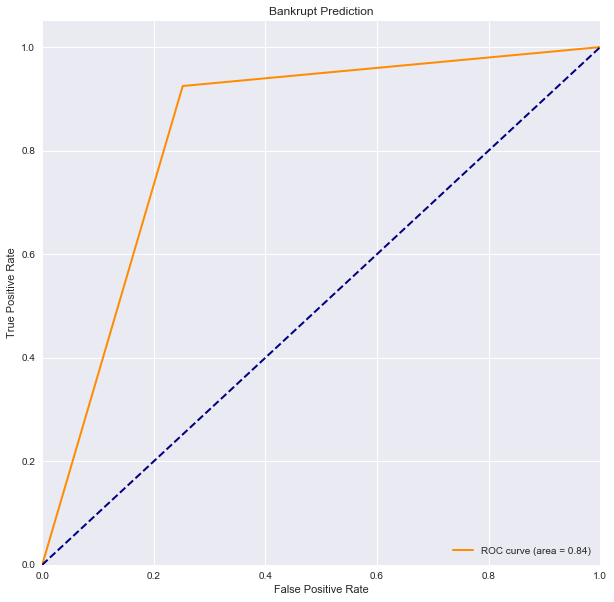

In [71]:
fpr,tpr,threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bankrupt Prediction')
plt.legend(loc="lower right")
plt.show()

## Logistic model with scaling

In [102]:
scaler = StandardScaler()

x1 = pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)

y1 = y

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
model1 = LogisticRegression()
train_performance,validation_performance = model_cross_validation(model,x1_train,y1_train,10)
cross_validation['Logistic model with scaling'] = (np.mean(train_performance), np.mean(validation_performance))
model1.fit(x1_train,y1_train)
y1_pred = model1.predict(x1_test)

print('Accuracy: ',accuracy_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred, digits=5))

Accuracy:  0.8390442674569365
              precision    recall  f1-score   support

         0.0    0.90739   0.75253   0.82274     29478
         1.0    0.79123   0.92431   0.85261     29911

    accuracy                        0.83904     59389
   macro avg    0.84931   0.83842   0.83767     59389
weighted avg    0.84889   0.83904   0.83778     59389



## Logistic model using categorical variables

In [73]:
# I use the data without scaling because it performs better than with scaling.
x2 = x.copy()

In [74]:
# dv, dltt, cstkcv can not be divided into 10 different groups so I will deal with others first.
x2 = x2.drop(['dv_lag1','dv_lag2','dltt_lag1','dltt_lag2','cstkcv_lag1','cstkcv_lag2'],axis=1)

In [75]:
# Categorical from 1 to 10 (so in the future maybe we can set NA and inf to 0)
for col in x2.columns:
    x2[col] = pd.qcut(x2[col],10,labels=np.arange(1,11))

In [76]:
x3 = x.copy()[['dv_lag1','dv_lag2','dltt_lag1','dltt_lag2','cstkcv_lag1','cstkcv_lag2']]

In [77]:
# They can only be divided into 3 categories.
for col in x3.columns:
    x3[col] = pd.qcut(x3[col],3,labels=np.arange(1,4))

In [78]:
x2 = x2.join(x3)

In [79]:
x2

,ni_lag1,fincf_lag1,ivncf_lag1,oancf_lag1,ch_lag1,gp_lag1,xint_lag1,lct_lag1,xrent_lag1,prcc_f_lag1,che_lag1,ni_lag2,fincf_lag2,ivncf_lag2,oancf_lag2,ch_lag2,gp_lag2,xint_lag2,lct_lag2,xrent_lag2,prcc_f_lag2,che_lag2,predict_year,dv_lag1,dv_lag2,dltt_lag1,dltt_lag2,cstkcv_lag1,cstkcv_lag2
0,7,6,7,3,2,2,4,3,1,7,2,6,5,7,6,3,2,4,3,1,5,2,6,1,3,2,2,3,3
1,7,4,7,5,1,3,4,2,1,7,1,6,6,8,3,2,2,5,3,1,5,2,7,1,1,2,2,3,3
2,8,3,7,7,3,3,4,2,1,7,2,7,4,7,5,1,2,5,3,1,6,1,7,3,1,2,2,3,3
3,8,3,10,4,5,3,4,2,1,8,4,7,3,7,6,2,2,4,2,1,6,2,7,3,3,2,2,3,3
4,8,7,6,6,6,3,4,4,1,8,5,8,3,6,7,3,3,3,4,1,7,4,9,3,3,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197957,4,7,10,2,5,1,3,2,3,1,5,3,8,7,1,4,1,3,1,4,4,6,2,1,1,2,1,1,1
197958,6,5,6,5,2,3,2,2,6,4,2,6,5,6,6,3,3,2,2,6,2,3,6,1,1,1,1,1,1
197959,2,9,2,4,7,7,9,7,8,5,6,3,10,2,8,8,7,9,8,8,8,8,5,3,3,3,3,1,1
197960,3,7,8,2,2,3,4,4,4,1,2,3,8,6,1,5,2,3,3,3,5,5,6,1,1,2,2,3,3


In [104]:
y2 = y
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
model2 = LogisticRegression()
train_performance,validation_performance = model_cross_validation(model,x2_train,y2_train,10)
cross_validation['Logistic model using categorical variables'] = (np.mean(train_performance), np.mean(validation_performance))
model2.fit(x2_train,y2_train)
y2_pred = model2.predict(x2_test)

print('Accuracy: ',accuracy_score(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred, digits=5))

Accuracy:  0.8948626850090085
              precision    recall  f1-score   support

         0.0    0.90480   0.88086   0.89267     29478
         1.0    0.88557   0.90866   0.89697     29911

    accuracy                        0.89486     59389
   macro avg    0.89519   0.89476   0.89482     59389
weighted avg    0.89512   0.89486   0.89483     59389



In [105]:
cross_validation

{'Logistic model without scaling': (0.8362828402097172, 0.8358193549928521),
 'Logistic model with scaling': (0.8398285058791288, 0.8396801820437656),
 'Logistic model using categorical variables': (0.8941055527768199,
  0.8941857073330913)}

# Exploratory Data Analysis #

In [81]:
#! pip install pandas-profiling

In [82]:
# import pandas_profiling
# profile = pandas_profiling.ProfileReport(cm1)
# profile.to_file(outputfile = 'Profile.html')
# profile